In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
data=pd.read_csv("C:/Users/Bouna/Downloads/housing.csv")
data.head()

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   20640 non-null  int64  
 1   MedInc       20640 non-null  float64
 2   HouseAge     20640 non-null  float64
 3   AveRooms     20640 non-null  float64
 4   AveBedrms    20640 non-null  float64
 5   Population   20640 non-null  float64
 6   AveOccup     20640 non-null  float64
 7   Latitude     20640 non-null  float64
 8   Longitude    20640 non-null  float64
 9   MedHouseVal  20640 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [25]:
data = data.drop(columns=['Unnamed: 0'])
print("\nColonne 'Unnamed: 0' supprimée.")


Colonne 'Unnamed: 0' supprimée.


In [26]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


--- Analyse de la variable cible : MedHouseVal ---


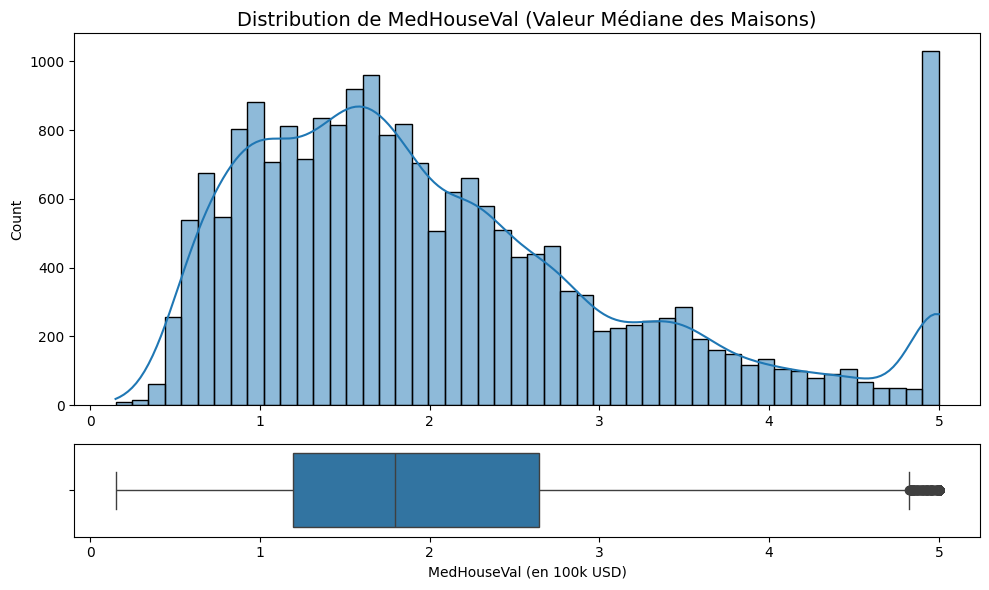


Statistiques descriptives pour MedHouseVal:
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


In [27]:
if data is not None:
    # 3. Explorer la variable cible (MedHouseVal)
    
    # Mettre la variable cible dans une variable pour un accès facile
    target_col = 'MedHouseVal'
    
    print(f"\n--- Analyse de la variable cible : {target_col} ---")
    
    # Créer une figure avec deux sous-graphiques (un en haut, un en bas)
    fig, (ax_hist, ax_box) = plt.subplots(2, 1, 
                                        gridspec_kw={"height_ratios": (0.8, 0.2)}, 
                                        figsize=(10, 6))
    
    # 1. Histogramme (en haut)
    sns.histplot(data[target_col], ax=ax_hist, kde=True, bins=50)
    ax_hist.set_title(f'Distribution de {target_col} (Valeur Médiane des Maisons)', 
                      fontsize=14)
    ax_hist.set_xlabel('') # On enlève l'axe X de l'histogramme
    
    # 2. Boxplot (en bas)
    sns.boxplot(x=data[target_col], ax=ax_box)
    ax_box.set_xlabel(f'{target_col} (en 100k USD)')
    
    # Afficher les graphiques
    plt.tight_layout() # Ajuste les graphiques pour éviter les superpositions
    plt.show()

    # Afficher quelques statistiques descriptives
    print("\nStatistiques descriptives pour MedHouseVal:")
    print(data[target_col].describe())

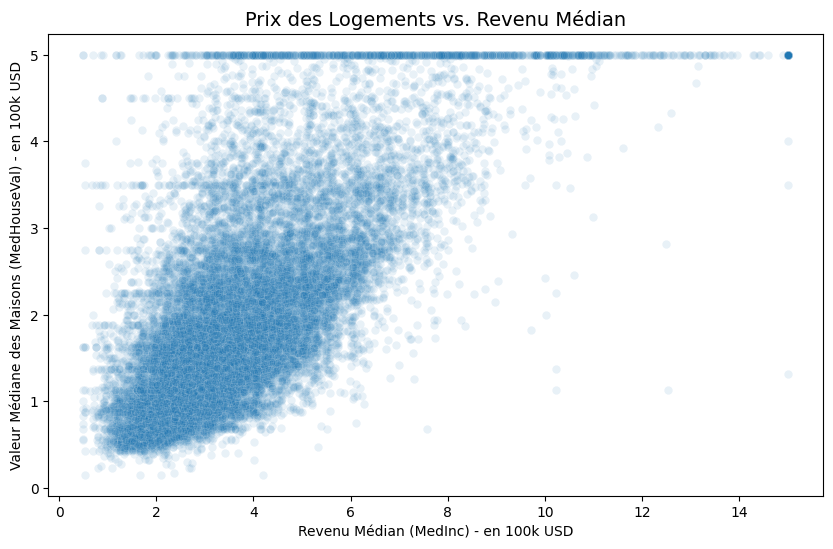

In [28]:
# Nous vérifions la relation entre 'MedInc' (Revenu) et 'MedHouseVal' (Prix)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='MedInc', y='MedHouseVal', alpha=0.1) 
# 'alpha=0.1' rend les points transparents pour mieux voir les zones denses

plt.title('Prix des Logements vs. Revenu Médian', fontsize=14)
plt.xlabel('Revenu Médian (MedInc) - en 100k USD')
plt.ylabel('Valeur Médiane des Maisons (MedHouseVal) - en 100k USD')
plt.show()

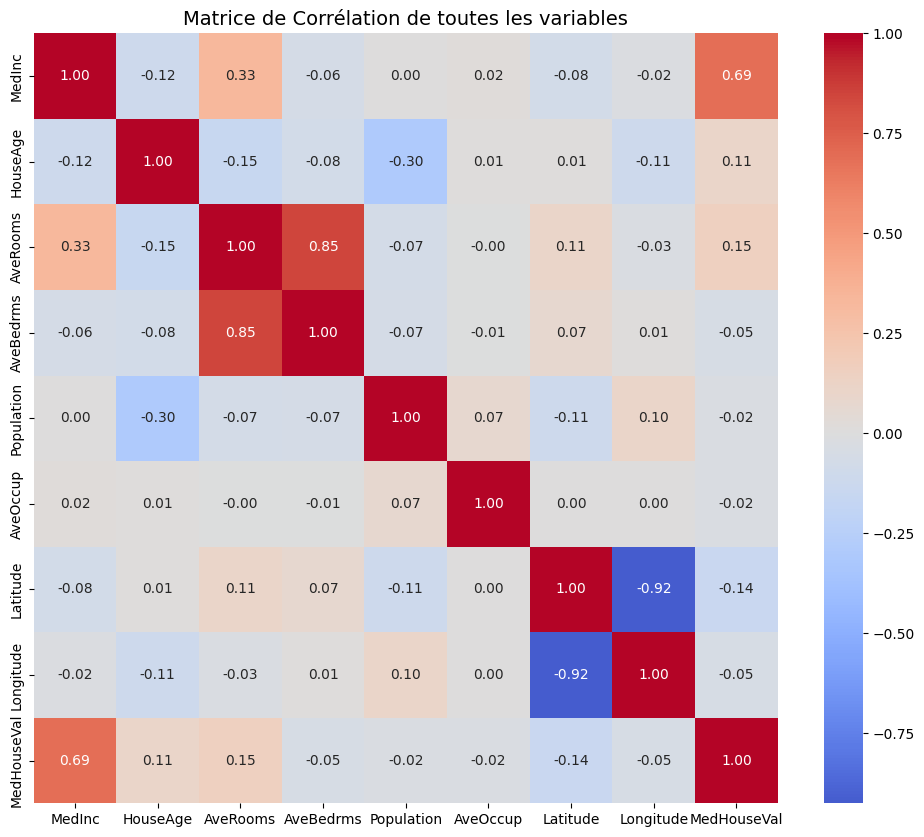

In [29]:
# Calculer la matrice de corrélation
corr_matrix = data.corr()

# Configurer la figure
plt.figure(figsize=(12, 10))

# Générer la heatmap
sns.heatmap(corr_matrix, 
            annot=True,     # Afficher les chiffres (coefficients)
            fmt=".2f",      # Formater les chiffres à 2 décimales
            cmap='coolwarm',# Utiliser une palette de couleurs bleu/rouge
            center=0)       # Centrer la couleur à 0

plt.title('Matrice de Corrélation de toutes les variables', fontsize=14)
plt.show()

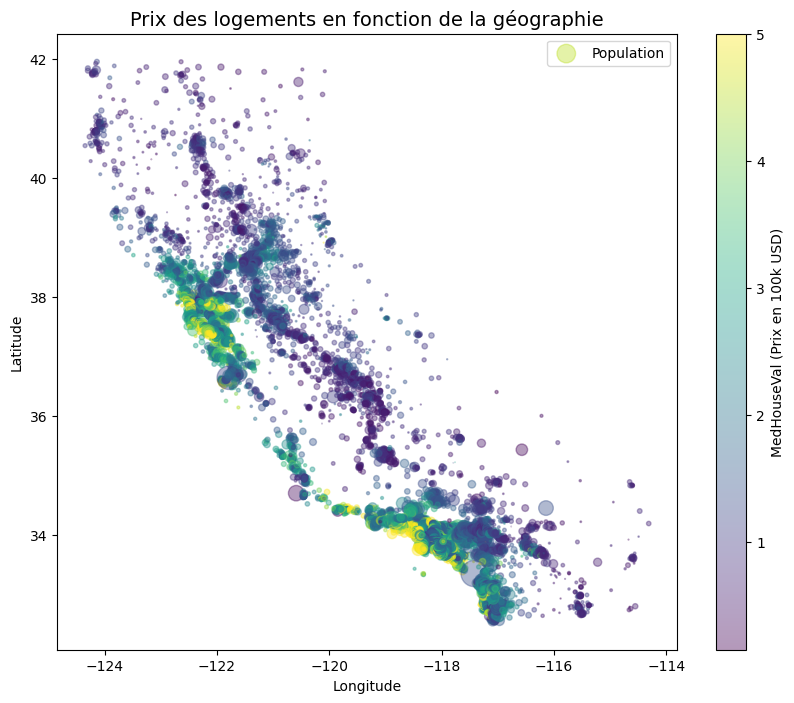

In [30]:
# Créer un nuage de points géographique
plt.figure(figsize=(10, 8))

# 'c' (color) est défini par notre cible, 'MedHouseVal'
# 's' (size) est défini par la 'Population' (divisée par 100 pour l'échelle)
# 'cmap' (colormap) est la palette de couleurs 'viridis'
# 'alpha' pour la transparence
scatter = plt.scatter(data=data, 
                      x='Longitude', 
                      y='Latitude', 
                      c='MedHouseVal', 
                      s=data['Population']/100, 
                      label='Population', 
                      cmap='viridis', 
                      alpha=0.4)

# Ajouter une barre de couleur pour l'échelle des prix
cbar = plt.colorbar(scatter)
cbar.set_label('MedHouseVal (Prix en 100k USD)')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Prix des logements en fonction de la géographie', fontsize=14)
plt.legend()
plt.show()

## Nettoyage des données

In [31]:
# 7. Vérification des valeurs manquantes

print("\n--- Vérification des valeurs manquantes (NaN) par colonne ---")
# Calculer le nombre de valeurs manquantes pour chaque colonne
missing_values = data.isnull().sum()

# Afficher uniquement les colonnes qui ont des valeurs manquantes (où le compte est > 0)
print(missing_values[missing_values > 0])


--- Vérification des valeurs manquantes (NaN) par colonne ---
Series([], dtype: int64)


## Cellule 8 : Vérification des Outliers pour l'Occupation

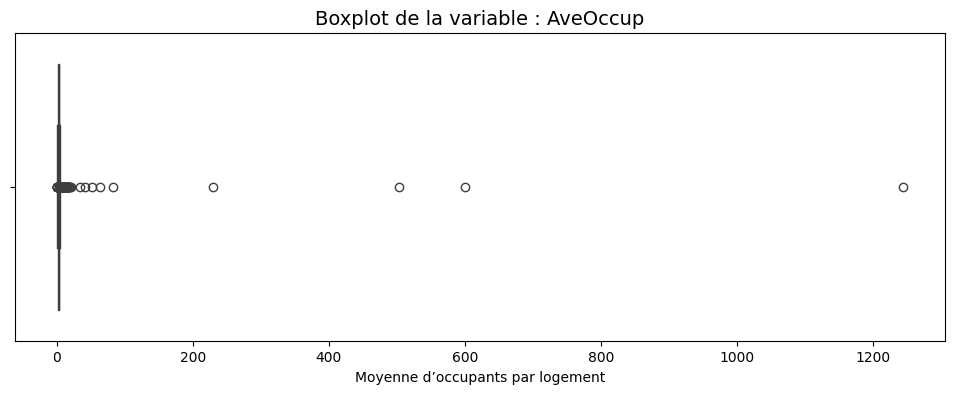


Statistiques descriptives pour AveOccup:
count    20640.000000
mean         3.070655
std         10.386050
min          0.692308
25%          2.429741
50%          2.818116
75%          3.282261
max       1243.333333
Name: AveOccup, dtype: float64


In [32]:
# 8. Visualisation des outliers pour la variable 'AveOccup'
feature_to_check = 'AveOccup'

plt.figure(figsize=(12, 4))
sns.boxplot(x=data[feature_to_check])
plt.title(f'Boxplot de la variable : {feature_to_check}', fontsize=14)
plt.xlabel('Moyenne d’occupants par logement')
plt.show()

# Afficher les statistiques pour comprendre l'étendue des outliers
print(f"\nStatistiques descriptives pour {feature_to_check}:")
print(data[feature_to_check].describe())

## Étape 9 : Traitement des Outliers (Clipping)

In [33]:
# 9. Plafonnement (Clipping) des outliers pour AveOccup

# Calculer le 99.9e percentile
upper_bound_occup = data['AveOccup'].quantile(0.999)
print(f"Le 99.9e percentile de AveOccup est : {upper_bound_occup:.2f}")

# Appliquer le plafonnement (toutes les valeurs > upper_bound sont remplacées par upper_bound)
data['AveOccup'] = np.where(data['AveOccup'] > upper_bound_occup, 
                           upper_bound_occup, 
                           data['AveOccup'])

print("\nLes outliers de 'AveOccup' au-delà du 99.9e percentile ont été plafonnés.")

# Vérification après plafonnement
print(f"La nouvelle valeur maximale de AveOccup est : {data['AveOccup'].max():.2f}")

Le 99.9e percentile de AveOccup est : 13.63

Les outliers de 'AveOccup' au-delà du 99.9e percentile ont été plafonnés.
La nouvelle valeur maximale de AveOccup est : 13.63


## Étape 10 : Vérification des Outliers pour la Population

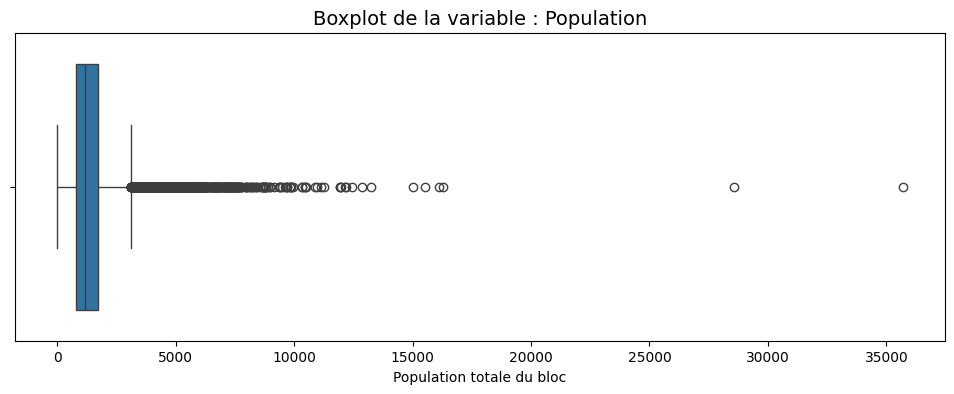


Statistiques descriptives pour Population:
count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: Population, dtype: float64


In [34]:
# 10. Visualisation des outliers pour la variable 'Population'
feature_to_check = 'Population'

plt.figure(figsize=(12, 4))
sns.boxplot(x=data[feature_to_check])
plt.title(f'Boxplot de la variable : {feature_to_check}', fontsize=14)
plt.xlabel('Population totale du bloc')
plt.show()

# Afficher les statistiques pour comprendre l'étendue des outliers
print(f"\nStatistiques descriptives pour {feature_to_check}:")
print(data[feature_to_check].describe())

In [35]:
# 11. Plafonnement (Clipping) des outliers pour Population

# Calculer le 99.9e percentile
upper_bound_pop = data['Population'].quantile(0.999)
print(f"Le 99.9e percentile de Population est : {upper_bound_pop:.0f}")

# Appliquer le plafonnement
data['Population'] = np.where(data['Population'] > upper_bound_pop, 
                            upper_bound_pop, 
                            data['Population'])

print("\nLes outliers de 'Population' au-delà du 99.9e percentile ont été plafonnés.")

# Vérification après plafonnement
print(f"La nouvelle valeur maximale de Population est : {data['Population'].max():.0f}")

Le 99.9e percentile de Population est : 10373

Les outliers de 'Population' au-delà du 99.9e percentile ont été plafonnés.
La nouvelle valeur maximale de Population est : 10373


## Feature Engineering

In [36]:
# 12. Création du ratio AveBedrms / AveRooms

# Créer la nouvelle colonne
data['Bedrooms_per_Room'] = data['AveBedrms'] / data['AveRooms']

print("Nouvelle feature 'Bedrooms_per_Room' créée avec succès.")

# Afficher les statistiques et les premières lignes pour validation
print("\nStatistiques descriptives pour Bedrooms_per_Room:")
print(data['Bedrooms_per_Room'].describe())

print("\nPremières lignes avec la nouvelle feature:")
print(data[['AveBedrms', 'AveRooms', 'Bedrooms_per_Room']].head())

Nouvelle feature 'Bedrooms_per_Room' créée avec succès.

Statistiques descriptives pour Bedrooms_per_Room:
count    20640.000000
mean         0.213075
std          0.058023
min          0.100000
25%          0.175426
50%          0.203181
75%          0.239834
max          1.000000
Name: Bedrooms_per_Room, dtype: float64

Premières lignes avec la nouvelle feature:
   AveBedrms  AveRooms  Bedrooms_per_Room
0   1.023810  6.984127           0.146591
1   0.971880  6.238137           0.155797
2   1.073446  8.288136           0.129516
3   1.073059  5.817352           0.184458
4   1.081081  6.281853           0.172096


## Application de la transformation log

Nouvelle feature 'MedInc_log' créée (logarithme naturel appliqué).


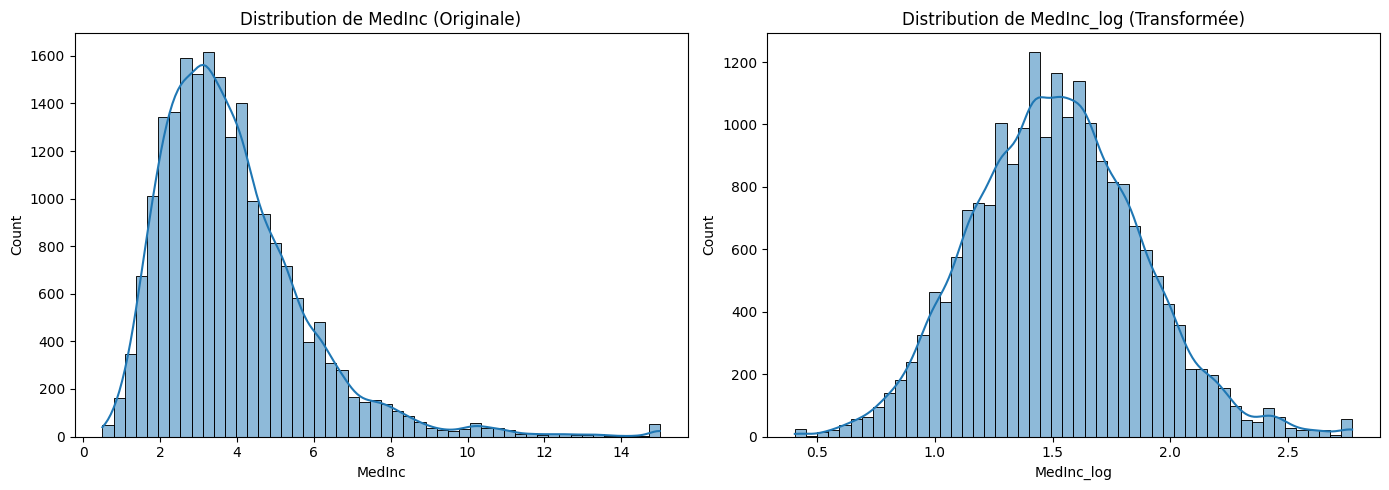

In [37]:
# 13. Transformation logarithmique de MedInc

# Créer une nouvelle colonne transformée
# Nous utilisons log(1 + x) pour gérer le cas où MedInc pourrait être 0,
# bien que d'après les statistiques, la valeur min est > 0.
data['MedInc_log'] = np.log1p(data['MedInc'])

print("Nouvelle feature 'MedInc_log' créée (logarithme naturel appliqué).")

# Visualisation pour voir l'effet de la transformation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data['MedInc'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution de MedInc (Originale)')

sns.histplot(data['MedInc_log'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution de MedInc_log (Transformée)')

plt.tight_layout()
plt.show()

In [38]:
# Vérification de la corrélation entre le nouveau ratio et le prix
ratio_corr = data['Bedrooms_per_Room'].corr(data['MedHouseVal'])

print(f"Corrélation entre Bedrooms_per_Room et MedHouseVal : {ratio_corr:.3f}")

if ratio_corr > 0.1:
    print("La corrélation est positive, votre hypothèse est confirmée.")
elif ratio_corr < -0.1:
    print("La corrélation est négative, ce qui suggère l'inverse : un ratio faible est associé à un prix élevé.")
else:
    print("La corrélation est trop faible pour être significative.")

Corrélation entre Bedrooms_per_Room et MedHouseVal : -0.256
La corrélation est négative, ce qui suggère l'inverse : un ratio faible est associé à un prix élevé.


Calcul de l'inertie pour K-Means: 100%|████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.36it/s]


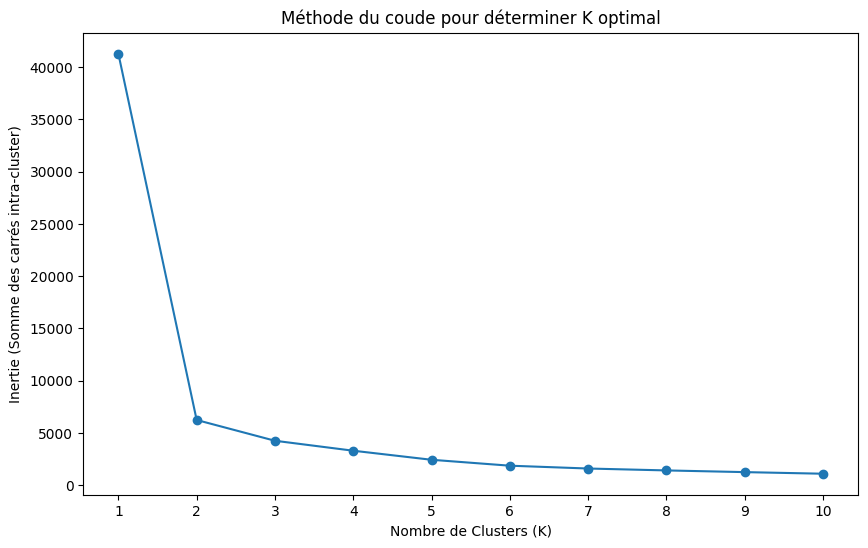

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm # Pour la barre de progression

# 1. Préparation des données géographiques (Latitude et Longitude)
X_geo = data[['Latitude', 'Longitude']]

# 2. Normalisation des données (crucial pour les algorithmes basés sur la distance)
scaler_geo = StandardScaler()
X_geo_scaled = scaler_geo.fit_transform(X_geo)

# 3. Calcul de l'inertie pour K de 1 à 10
max_clusters = 10
inertia = []

# La boucle calcule le coût (inertie) pour chaque K
for i in tqdm(range(1, max_clusters + 1), desc="Calcul de l'inertie pour K-Means"):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_geo_scaled)
    inertia.append(kmeans.inertia_)

# 4. Tracé de la courbe du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.title('Méthode du coude pour déterminer K optimal')
plt.xlabel('Nombre de Clusters (K)')
plt.ylabel('Inertie (Somme des carrés intra-cluster)')
plt.xticks(range(1, max_clusters + 1))
plt.show()

Clustering K-Means appliqué avec K=2. Nouvelle feature 'Geo_Cluster' créée.
Distribution des observations par cluster:
Geo_Cluster
1    8828
0    7749
3    2230
2    1833
Name: count, dtype: int64


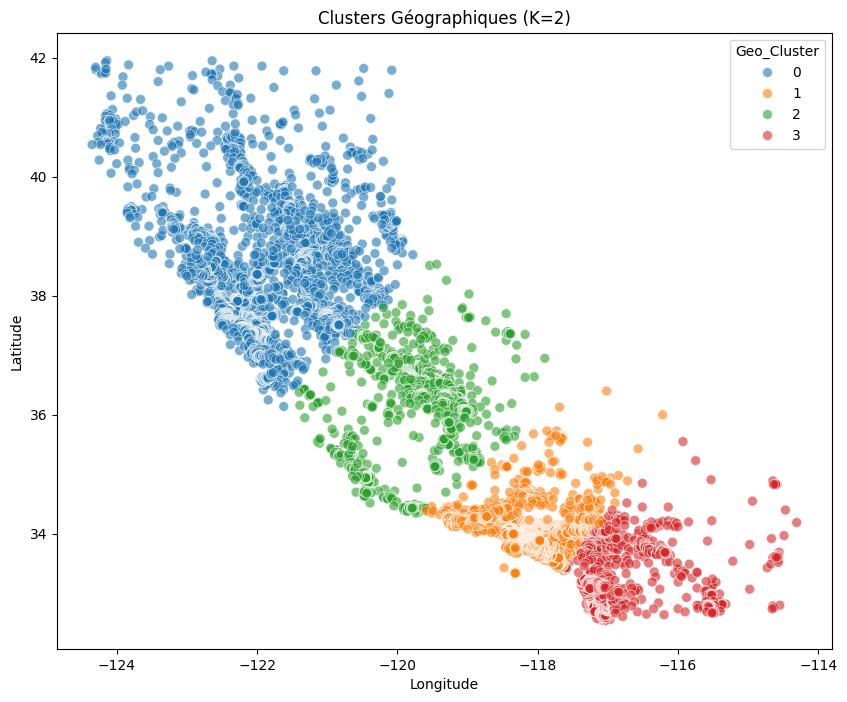

In [42]:
# 15. Application du K-Means avec K=2

from sklearn.cluster import KMeans

# Les données X_geo_scaled ont été préparées et normalisées à l'étape 14
# Nous les réutilisons ici.
# X_geo_scaled = df[['Latitude', 'Longitude']] normalisées

# Initialisation et ajustement du modèle K-Means avec K=2
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
# Ajouter les étiquettes de cluster (0 ou 1) à notre DataFrame
data['Geo_Cluster'] = kmeans.fit_predict(X_geo_scaled)

print("Clustering K-Means appliqué avec K=2. Nouvelle feature 'Geo_Cluster' créée.")
print("Distribution des observations par cluster:")
# Afficher le nombre d'observations dans chaque cluster
print(data['Geo_Cluster'].value_counts())

# Visualisation des clusters sur la carte
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, 
                x='Longitude', 
                y='Latitude', 
                hue='Geo_Cluster', # La couleur est donnée par le cluster
                palette='tab10', 
                legend='full', 
                s=50, 
                alpha=0.6)

plt.title('Clusters Géographiques (K=2)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Étape 17 : Séparation des Données (Train/Test/Validation)

In [43]:
from sklearn.model_selection import train_test_split, GroupKFold

# 1. Définir les Features (X) et la Cible (y)
# Nous utiliserons la version log de MedInc
X = data.drop(columns=['MedHouseVal', 'MedInc']) # On retire l'ancienne MedInc
y = data['MedHouseVal']
groups = data['Geo_Cluster'] # Utilisation du cluster pour la séparation

print(f"Features sélectionnées : {X.columns.tolist()}")

# 2. Séparation Train/Test (80% / 20%)
# Nous n'utilisons pas GroupKFold ici, mais une simple répartition
# stratification (garder la même proportion de MedHouseVal) est plus simple pour cette étape
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    shuffle=True # Le mélange (shuffle) est important avant la séparation
)

print(f"\nDonnées d'entraînement : {X_train.shape[0]} observations")
print(f"Données de test : {X_test.shape[0]} observations")

# 3. Séparation Train/Validation à partir du Train set (75% / 25% du Train set)
# Cela donne 60% Train, 20% Val, 20% Test (proportion générale)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.25, # 25% de 80% = 20% du total
    random_state=42
)

print(f"\n--- Répartition finale ---")
print(f"Entraînement (Train) : {X_train.shape[0]} obs (60%)")
print(f"Validation (Val) : {X_val.shape[0]} obs (20%)")
print(f"Test (Test) : {X_test.shape[0]} obs (20%)")

# Nous avons besoin des groupes pour le KFold ultérieur, donc on les sépare aussi
groups_train = X_train['Geo_Cluster']
groups_val = X_val['Geo_Cluster']
groups_test = X_test['Geo_Cluster']

Features sélectionnées : ['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'Bedrooms_per_Room', 'MedInc_log', 'Geo_Cluster']

Données d'entraînement : 16512 observations
Données de test : 4128 observations

--- Répartition finale ---
Entraînement (Train) : 12384 obs (60%)
Validation (Val) : 4128 obs (20%)
Test (Test) : 4128 obs (20%)


## Pretraitement Normalisation et encodage

## Étape 18 : Définition du ColumnTransformer

Pour commencer, nous devons organiser nos colonnes en deux groupes :

Numériques : Celles que nous allons standardiser (mettre à la même échelle).

Catégorielles : Celles que nous allons encoder (transformer en chiffres pour le modèle)

## Cellule 18 : Définition du Prétraitement

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import numpy as np

# 1. Définition des colonnes par type
# Features Numériques à Standardiser
# Nous incluons les features originales et les nouvelles features numériques
numerical_features = [
    'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 
    'Latitude', 'Longitude', 'Bedrooms_per_Room', 'MedInc_log'
]

# Features Catégorielles à Encoder (Geo_Cluster créé à l'étape 16)
# Le ColumnTransformer peut aussi gérer les colonnes de type 'int' si on le lui indique
categorical_features = ['Geo_Cluster']

# 2. Création des pipelines de prétraitement
# Pour les colonnes numériques : Standardisation (mise à l'échelle)
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Pour les colonnes catégorielles : One-Hot Encoding
# drop='first' ou handle_unknown='ignore' sont souvent utilisés pour éviter
# la multicolinéarité et gérer les nouvelles catégories, mais 'passthrough' 
# est plus simple pour l'instant.
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) 
])

# 3. Combinaison dans le ColumnTransformer
# Le ColumnTransformer applique les pipelines ci-dessus aux colonnes spécifiées
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough' # Assurez-vous qu'aucune autre colonne n'est laissée de côté
)

print("ColumnTransformer défini avec succès.")

# 4. Application du ColumnTransformer (pour vérification)
# Nous appliquons le fit_transform uniquement sur l'ensemble d'entraînement
X_train_processed = preprocessor.fit_transform(X_train)

# Affichage de la nouvelle forme des données
print(f"\nForme originale (X_train) : {X_train.shape}")
print(f"Forme transformée (X_train_processed) : {X_train_processed.shape}")

ColumnTransformer défini avec succès.

Forme originale (X_train) : (12384, 10)
Forme transformée (X_train_processed) : (12384, 13)


## Étape 19 : Modélisation (Construction du Pipeline)

Maintenant que nous avons défini le prétraitement, l'étape suivante, selon votre cahier des charges, est la Modélisation.

Nous allons construire un Pipeline complet pour encapsuler le ColumnTransformer (prétraitement) et un algorithme de régression (modèle) ensemble. Commençons par un modèle simple mais puissant : la Régression Linéaire (Linear Regression).

## Cellule 19 : Pipeline de Régression Linéaire

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Définir le modèle
lr_model = LinearRegression()

# 2. Construire le pipeline complet : Prétraitement + Modèle
# Le 'preprocessor' vient de l'Étape 18
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lr_model)
])

print("Pipeline de Régression Linéaire construit.")

# 3. Entraînement du modèle
print("\nDébut de l'entraînement du modèle...")
# Le pipeline applique automatiquement le fit_transform à X_train et le fit à y_train
lr_pipeline.fit(X_train, y_train)
print("Entraînement terminé.")

# 4. Prédictions sur l'ensemble de Validation (X_val)
y_val_pred_lr = lr_pipeline.predict(X_val)

Pipeline de Régression Linéaire construit.

Début de l'entraînement du modèle...
Entraînement terminé.


## Étape 20 : Évaluation du Modèle de Régression Linéaire

Cellule 20 : Calcul et affichage des métriques

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# y_val et y_val_pred_lr sont les résultats de l'Étape 19

# 1. Calculer les métriques
mae_lr = mean_absolute_error(y_val, y_val_pred_lr)
mse_lr = mean_squared_error(y_val, y_val_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_val, y_val_pred_lr)

# 2. Affichage des résultats
print("--- Évaluation du Modèle de Régression Linéaire sur l'ensemble de Validation ---")
print(f"MAE (Mean Absolute Error) : {mae_lr:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse_lr:.4f}")
print(f"R² (Coefficient de Détermination) : {r2_lr:.4f}")

# Conversion des métriques en USD pour l'interprétation
print("\nInterprétation des erreurs (en USD, car MedHouseVal est en 100k USD):")
print(f"MAE en USD : ${mae_lr * 100000:,.2f}")
print(f"RMSE en USD : ${rmse_lr * 100000:,.2f}")

--- Évaluation du Modèle de Régression Linéaire sur l'ensemble de Validation ---
MAE (Mean Absolute Error) : 0.5123
RMSE (Root Mean Squared Error): 0.6822
R² (Coefficient de Détermination) : 0.6610

Interprétation des erreurs (en USD, car MedHouseVal est en 100k USD):
MAE en USD : $51,230.75
RMSE en USD : $68,224.16


## Étape 21 : Amélioration du Modèle (Passage aux Arbres)

Nous allons maintenant construire et entraîner un pipeline avec un RandomForestRegressor

## Cellule 21 : Pipeline de Forêt Aléatoire

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Définir le modèle
# Utilisation de paramètres par défaut pour une première tentative
# n_estimators=100 (100 arbres), random_state=42 pour la reproductibilité
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) 
# n_jobs=-1 utilise tous les cœurs du processeur

# 2. Construire le pipeline complet : Prétraitement + Modèle
# Nous réutilisons le 'preprocessor' défini à l'Étape 18
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_model)
])

print("Pipeline de Forêt Aléatoire construit.")

# 3. Entraînement du modèle
print("\nDébut de l'entraînement du modèle Random Forest...")
rf_pipeline.fit(X_train, y_train)
print("Entraînement terminé.")

# 4. Prédictions sur l'ensemble de Validation (X_val)
y_val_pred_rf = rf_pipeline.predict(X_val)

Pipeline de Forêt Aléatoire construit.

Début de l'entraînement du modèle Random Forest...
Entraînement terminé.


## Étape 22 : Évaluation du Modèle de Forêt Aléatoire

## Cellule 22 : Calcul et affichage des métriques

In [48]:
# y_val et y_val_pred_rf sont les résultats de l'Étape 21

# 1. Calculer les métriques
mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_val, y_val_pred_rf)

# 2. Affichage des résultats
print("--- Évaluation du Modèle de Forêt Aléatoire sur l'ensemble de Validation ---")
print(f"MAE (Mean Absolute Error) : {mae_rf:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse_rf:.4f}")
print(f"R² (Coefficient de Détermination) : {r2_rf:.4f}")

--- Évaluation du Modèle de Forêt Aléatoire sur l'ensemble de Validation ---
MAE (Mean Absolute Error) : 0.3368
RMSE (Root Mean Squared Error): 0.5099
R² (Coefficient de Détermination) : 0.8107


## Étape 23 : Importance des Variables (Feature Importance)

Maintenant que nous avons un modèle performant, l'une des exigences de votre cahier des charges est l'Explicabilité du modèle. Pour les modèles à base d'arbres, nous pouvons facilement récupérer l'importance des variables (Feature Importance).

Cela nous dira quelles features (y compris celles que nous avons créées) ont été les plus utiles pour la prédiction.

## Cellule 23 : Affichage de l'Importance des Features

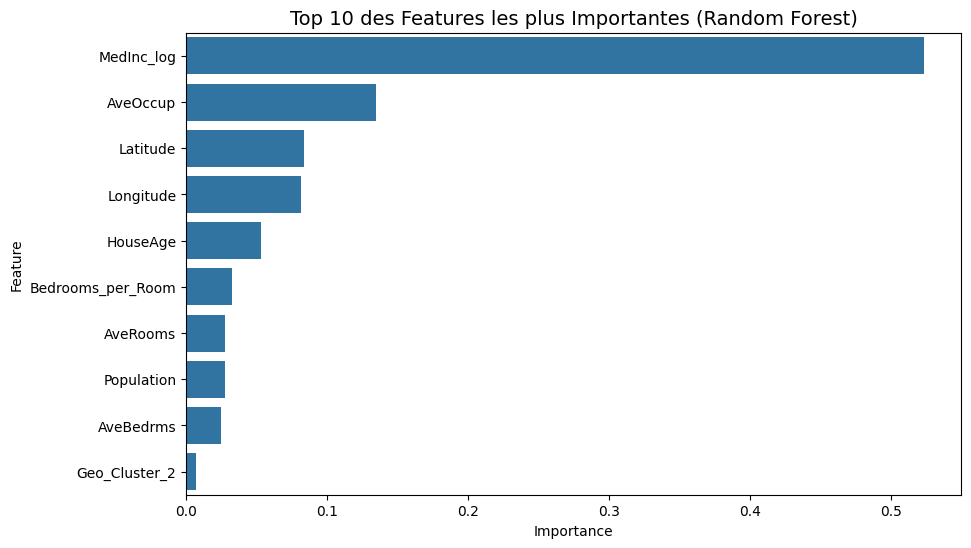

--- Importance des Features (Top 10) ---
| Feature           |   Importance |
|:------------------|-------------:|
| MedInc_log        |       0.5233 |
| AveOccup          |       0.1350 |
| Latitude          |       0.0839 |
| Longitude         |       0.0818 |
| HouseAge          |       0.0531 |
| Bedrooms_per_Room |       0.0325 |
| AveRooms          |       0.0274 |
| Population        |       0.0273 |
| AveBedrms         |       0.0247 |
| Geo_Cluster_2     |       0.0070 |


In [50]:
# 1. Récupérer le modèle Random Forest entraîné (le regressor dans le pipeline)
rf_trained_model = rf_pipeline.named_steps['regressor']

# 2. Récupérer les noms des features après le prétraitement
# Le ColumnTransformer est complexe, nous devons récupérer les noms des colonnes après OHE
feature_names = []
# Noms des colonnes numériques
feature_names.extend(rf_pipeline.named_steps['preprocessor'].transformers_[0][2])
# Noms des colonnes catégorielles encodées (OHE)
ohe_feature_names = rf_pipeline.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(rf_pipeline.named_steps['preprocessor'].transformers_[1][2])
feature_names.extend(ohe_feature_names)

# 3. Récupérer l'importance des features du modèle
importances = rf_trained_model.feature_importances_

# 4. Créer un DataFrame pour la visualisation
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 5. Affichage graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 des Features les plus Importantes (Random Forest)', fontsize=14)
plt.savefig("feature_importance.png")
plt.show()

# Affichage du tableau
print("--- Importance des Features (Top 10) ---")
print(feature_importance_df.head(10).to_markdown(index=False, floatfmt=".4f"))

## Étape 24 : Évaluation Finale sur l'Ensemble de Test

# Cellule 24 : Calcul des métriques finales

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# y_test contient les vraies valeurs, X_test contient les features

# 1. Faire les prédictions sur l'ensemble de TEST
y_test_pred_rf = rf_pipeline.predict(X_test)

# 2. Calculer les métriques
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# 3. Affichage des résultats
print("--- Évaluation FINALE du Modèle de Forêt Aléatoire sur l'ensemble de TEST ---")
print(f"MAE (Mean Absolute Error) : {mae_test_rf:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse_test_rf:.4f}")
print(f"R² (Coefficient de Détermination) : {r2_test_rf:.4f}")

# 4. Conversion en USD pour l'interprétation
print("\nInterprétation des erreurs (en USD):")
print(f"RMSE en USD : ${rmse_test_rf * 100000:,.2f}")

--- Évaluation FINALE du Modèle de Forêt Aléatoire sur l'ensemble de TEST ---
MAE (Mean Absolute Error) : 0.3312
RMSE (Root Mean Squared Error): 0.5059
R² (Coefficient de Détermination) : 0.8047

Interprétation des erreurs (en USD):
RMSE en USD : $50,588.98


## Cellule 25 : Calcul et Visualisation SHAP

Génération du Summary Plot SHAP (peut prendre quelques secondes)...


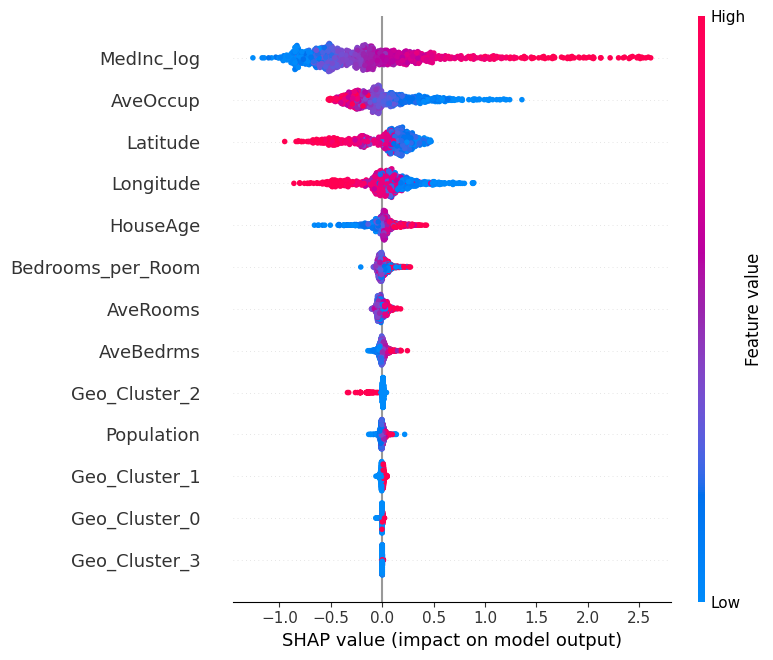

In [53]:
import shap

# L'analyse SHAP est très gourmande en calcul.
# Nous allons utiliser seulement un échantillon aléatoire de l'ensemble de test (1000 obs)
X_test_sample = X_test.sample(n=1000, random_state=42)

# Le préprocesseur doit être appliqué aux données de l'échantillon X_test
X_test_processed_sample = rf_pipeline.named_steps['preprocessor'].transform(X_test_sample)

# Récupérer le modèle Random Forest entraîné
rf_trained_model = rf_pipeline.named_steps['regressor']

# Récupérer les noms de features après l'encodage (fait dans l'Étape 23)
# Nous devons refaire cette étape car SHAP en a besoin
feature_names_shap = []
feature_names_shap.extend(rf_pipeline.named_steps['preprocessor'].transformers_[0][2])
ohe_feature_names_shap = rf_pipeline.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(rf_pipeline.named_steps['preprocessor'].transformers_[1][2])
feature_names_shap.extend(ohe_feature_names_shap)


# 1. Créer l'Explainer SHAP
# TreeExplainer est la méthode optimisée pour les modèles à base d'arbres
explainer = shap.TreeExplainer(rf_trained_model)

# 2. Calculer les valeurs SHAP
# On utilise l'échantillon des données de test traitées
shap_values = explainer.shap_values(X_test_processed_sample)

# 3. Visualisation du Summary Plot SHAP
print("Génération du Summary Plot SHAP (peut prendre quelques secondes)...")
# Note: On passe la version prétraitée pour le calcul, et on passe l'échantillon original pour l'affichage (car SHAP gère l'affichage)
shap.summary_plot(shap_values, 
                  X_test_processed_sample, 
                  feature_names=feature_names_shap)

Interprétation de MedInc_log dans le Summary Plot
Si vous regardez la première ligne du graphique pour MedInc_log :

Les points colorés en rouge (valeur élevée de la feature) sont poussés vers la droite (valeur SHAP positive).

Les points colorés en bleu (faible valeur de la feature) sont poussés vers la gauche (valeur SHAP négative).

Conclusion : Cela confirme de manière explicite la corrélation positive. Un revenu médian élevé (rouge à droite) est le facteur le plus puissant pour augmenter la prédiction de prix, tandis qu'un faible revenu médian (bleu à gauche) est le facteur qui tire le plus le prix vers le bas. C'est le cœur de notre modèle.

## Étape 26 : Sauvegarde du Pipeline (Livrable Final)

Nous avons terminé le développement, l'évaluation, et l'interprétation. La prochaine étape, et l'une des exigences du livrable, est la sauvegarde du modèle pour un déploiement futur.

Nous allons utiliser la bibliothèque joblib (un outil standard de scikit-learn) pour sauvegarder notre pipeline complet (prétraitement + modèle) dans un fichier .joblib.

## Cellule 26 : Sauvegarde du Pipeline

In [54]:
import joblib
import os

# Définir le nom du fichier de sauvegarde
model_filename = 'random_forest_housing_pipeline.joblib'

# Sauvegarder le pipeline complet (qui contient le preprocessor et le modèle RF)
joblib.dump(rf_pipeline, model_filename)

# Vérification (optionnel : affiche la taille du fichier)
file_size = os.path.getsize(model_filename)
print(f"Pipeline complet sauvegardé avec succès dans '{model_filename}'.")
print(f"Taille du fichier : {file_size / (1024*1024):.2f} Mo.")

Pipeline complet sauvegardé avec succès dans 'random_forest_housing_pipeline.joblib'.
Taille du fichier : 103.63 Mo.


## Cellule 27 : Sauvegarde du Modèle K-Means

In [55]:
# Nous allons utiliser le modèle K-Means entraîné à l'Étape 16
# Si vous avez réexécuté la cellule 16, la variable 'kmeans' est disponible.

import joblib

# Sauvegarder le modèle KMeans qui a généré la feature 'Geo_Cluster'
joblib.dump(kmeans, 'kmeans_geo_model.joblib')

print("Modèle KMeans Geo Cluster sauvegardé sous 'kmeans_geo_model.joblib'.")

Modèle KMeans Geo Cluster sauvegardé sous 'kmeans_geo_model.joblib'.
